In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten,MaxPool2D,Conv2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.datasets import mnist
from pathlib import Path


Using TensorFlow backend.


In [2]:
#加载数据集
(train_x,train_y),(test_x,test_y)=mnist.load_data()

In [3]:
#reshape 数据集来符合网络输入
train_x=np.reshape(train_x,(-1,28,28,1))
print("train_x.shape:{}".format(train_x.shape))
train_y=np_utils.to_categorical(train_y,10)
print("train_y.shape:{}".format(train_y.shape))

test_x=np.reshape(test_x,(-1,28,28,1))
print("test_x.shape:{}".format(test_x.shape))
test_y=np_utils.to_categorical(test_y,10)
print("test_y.shape:{}".format(test_y.shape))

train_x.shape:(60000, 28, 28, 1)
train_y.shape:(60000, 10)
test_x.shape:(10000, 28, 28, 1)
test_y.shape:(10000, 10)


In [4]:
#构建模型
model = Sequential()
# 1、卷积层
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation ='relu', input_shape = (28,28,1)))
# 2、卷积层
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu'))
# 3、池化层
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 4、卷积层
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', activation ='relu'))
# 5、卷积层
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
# 6、池化层
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#展平，为全连接做准备
model.add(Flatten())
# 7、全连接层
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
# 8、全连接层添加输出10个节点表示10个分类，用softmax来激活分类
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
#RMSprop是Geoff Hinton提出的一种自适应学习率方法，RMSprop仅仅是计算对应的平均值，因此可缓解Adagrad算法学习率下降较快的问题
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# 编译 使用多类的对数损失categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
# 输出模型结构
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [6]:
print("========开始训练============")
#训练
# verbose: 0, 1 或 2。日志显示模式。 0 = 安静模式, 1 = 进度条, 2 = 每轮一行。
history = model.fit(train_x,train_y,
           batch_size=64,
           epochs=10,
           verbose=1,
           validation_data=(test_x,test_y))
print("========训练结束============")

========开始训练============
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 194s 3ms/step - loss: 1.8679 - acc: 0.8293 - val_loss: 0.0710 - val_acc: 0.9794
Epoch 2/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.1086 - acc: 0.9699 - val_loss: 0.0859 - val_acc: 0.9787
Epoch 3/10
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0898 - acc: 0.9759 - val_loss: 0.0483 - val_acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0835 - acc: 0.9776 - val_loss: 0.0416 - val_acc: 0.9875
Epoch 5/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0857 - acc: 0.9774 - val_loss: 0.0495 - val_acc: 0.9858
Epoch 6/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0823 - acc: 0.9785 - val_loss: 0.0648 - val_acc: 0.9864
Epoch 7/10
60000/60000 [=========================

In [7]:
# verbose: 0 或 1。日志显示模式。 0 = 安静模式，1 = 进度条
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(train_x, train_y, verbose=1)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

10000/10000 [==============================] - 10s 1ms/step
Test loss: 0.05960639448354705
Test accuracy: 0.9839
60000/60000 [==============================] - 61s 1ms/step
Train loss: 0.057602681390150366
Train accuracy: 0.9848666666666667


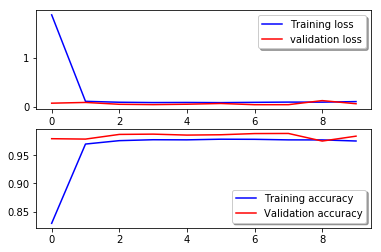

In [8]:
# 显示损失 准确率
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
plt.show()

In [9]:
# 保存CNN网络结构
model_structure = model.to_json()
f = Path("model_save/model_structure_10epochs.json")
f.write_text(model_structure)

# 保存训练好的权重参数
model.save_weights("model_save/model_weights_10epochs.h5")